In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

os.chdir('Copilot/algorithm/context')

[2025-02-03 11:26:56,339] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)



Word counts for each algorithm:
accelerated_lingam: 127 words
accelerated_pc: 97 words
bamb: 216 words
cdnod: 185 words
corl: 179 words
fci: 98 words
fges: 216 words
ges: 184 words
golem: 159 words
grasp: 0 words
guidelines: 423 words
hiton_mb: 187 words
hybrid: 229 words
iambnpc: 182 words
inter_iamb: 188 words
lingam: 129 words
mbor: 200 words
notears: 129 words
notears_mlp: 164 words
pc: 175 words
xges: 198 words

Estimated total tokens: 2742


/home/xinyue/.conda/envs/llava/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


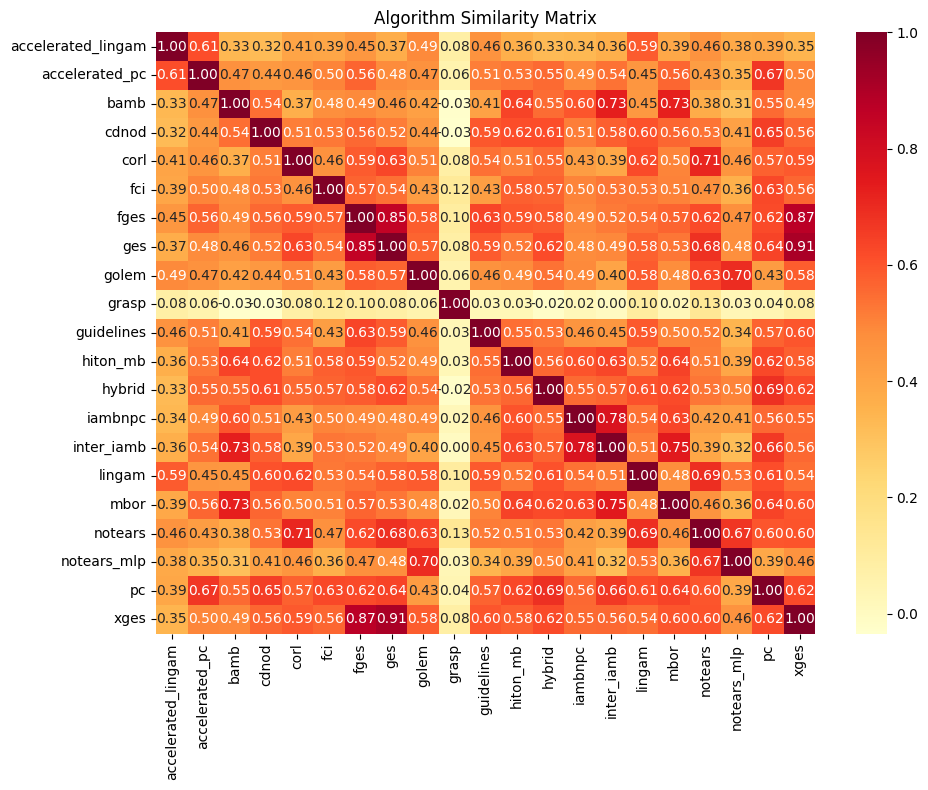


Most similar algorithm pairs:
ges - xges: 0.907
fges - xges: 0.871
fges - ges: 0.854
iambnpc - inter_iamb: 0.775
inter_iamb - mbor: 0.748


In [3]:
# Load algorithm descriptions and count words
algo_descriptions = []
algo_names = []
word_counts = {}
total_tokens = 0

for file in sorted(os.listdir('algos')):
    if file.endswith('.txt'):
        with open(os.path.join('algos', file), 'r') as f:
            text = f.read()
            algo_descriptions.append(text)
            algo_names.append(file.replace('.txt', ''))
            
            # Count words
            words = text.split()
            word_count = len(words)
            word_counts[file.replace('.txt', '')] = word_count
            
            # Estimate tokens (rough estimate: 1 token ≈ 0.75 words)
            total_tokens += int(word_count * 0.75)

# Print word counts
print("\nWord counts for each algorithm:")
for algo, count in word_counts.items():
    print(f"{algo}: {count} words")
print(f"\nEstimated total tokens: {total_tokens}")

# Initialize sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(algo_descriptions)

# Calculate pairwise cosine similarities
similarities = cosine_similarity(embeddings)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, 
            xticklabels=algo_names,
            yticklabels=algo_names,
            cmap='YlOrRd',
            annot=True,
            fmt='.2f')
plt.title('Algorithm Similarity Matrix')
plt.tight_layout()
plt.show()

# Print most similar pairs
n_algorithms = len(algo_names)
similar_pairs = []
for i in range(n_algorithms):
    for j in range(i+1, n_algorithms):
        similar_pairs.append((algo_names[i], 
                            algo_names[j], 
                            similarities[i,j]))

# Sort by similarity score
similar_pairs.sort(key=lambda x: x[2], reverse=True)

print("\nMost similar algorithm pairs:")
for algo1, algo2, score in similar_pairs[:5]:
    print(f"{algo1} - {algo2}: {score:.3f}")


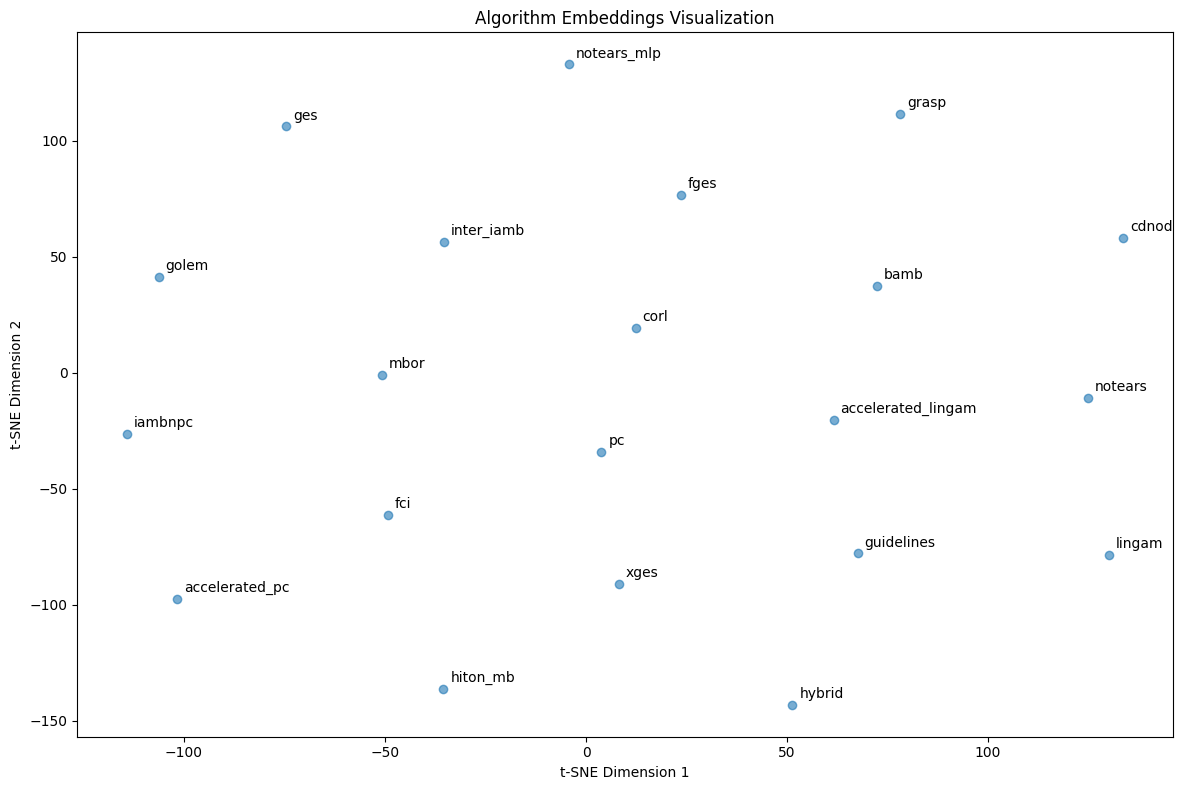

In [5]:
# Reduce dimensionality for visualization
from sklearn.manifold import TSNE

# Apply t-SNE to reduce embeddings to 2D
# Set perplexity lower than number of samples
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1))
embeddings_2d = tsne.fit_transform(embeddings)

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6)

# Add labels for each point
for i, algo in enumerate(algo_names):
    plt.annotate(algo, 
                (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=10)

plt.title('Algorithm Embeddings Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.tight_layout()
plt.show()
